In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew


dataset = pd.read_csv("dataset.csv")

In [224]:
dataset.head()

,neighbourhood,price,size,bedrooms,bathrooms,building
0,PLY,105000.0,1493.0,1.0,NaN,Building_86
1,PLY,53000.0,400.0,0.0,1.0,NaN
2,SNR,175000.0,1415.0,2.0,2.0,Building_283
3,SNR,125000.0,1106.0,1.0,2.0,Building_233
4,ZMS,110000.0,1052.0,1.0,2.0,Building_250


In [225]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67107 entries, 0 to 67106
Data columns (total 6 columns):
neighbourhood    67107 non-null object
price            67107 non-null float64
size             67106 non-null float64
bedrooms         67106 non-null float64
bathrooms        63654 non-null float64
building         61094 non-null object
dtypes: float64(4), object(2)
memory usage: 3.1+ MB


In [226]:
dataset.describe()

,price,size,bedrooms,bathrooms
count,6.710700e+04,6.710600e+04,67106.000000,63654.000000
mean,2.126896e+05,1.605106e+03,1.656886,2.402913
std,5.951512e+06,8.325682e+03,1.007925,1.074872
min,1.200000e+04,-7.550000e+02,0.000000,1.000000
25%,8.900000e+04,8.400000e+02,1.000000,2.000000
50%,1.200000e+05,1.200000e+03,2.000000,2.000000
75%,1.550000e+05,1.640000e+03,2.000000,3.000000
max,5.653430e+08,1.170000e+06,12.000000,12.000000


In [227]:
dataset.shape

(67107, 6)

In [228]:
dataset.columns

Index(['neighbourhood', 'price', 'size', 'bedrooms', 'bathrooms', 'building'], dtype='object')

In [229]:
dataset.index

RangeIndex(start=0, stop=67107, step=1)

In [230]:
dataset.isna().sum()

neighbourhood       0
price               0
size                1
bedrooms            1
bathrooms        3453
building         6013
dtype: int64

In [231]:
#Imputation 
dataset = dataset.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [232]:
dataset.isna().sum()

neighbourhood    0
price            0
size             0
bedrooms         0
bathrooms        0
building         0
dtype: int64

In [233]:
#REMOVING BUILDING Columns
dataset = dataset.iloc[:,0:-1]

In [234]:
dataset.columns

Index(['neighbourhood', 'price', 'size', 'bedrooms', 'bathrooms'], dtype='object')

In [235]:
dataset.iloc[:,3:5].apply(lambda x: x.unique().tolist(), axis=0)

bedrooms     [1.0, 0.0, 2.0, 3.0, 4.0, 5.0, 10.0, 6.0, 12.0...
bathrooms    [2.0, 1.0, 5.0, 3.0, 4.0, 6.0, 7.0, 12.0, 8.0,...
dtype: object

In [236]:
dataset.iloc[:,3:5].apply(lambda x: x.value_counts(), axis=0)

,bedrooms,bathrooms
0.0,7329.0,NaN
1.0,23955.0,12444.0
2.0,23274.0,29294.0
3.0,9905.0,15834.0
4.0,2348.0,6929.0
5.0,225.0,2145.0
6.0,65.0,372.0
7.0,NaN,72.0
8.0,NaN,12.0
9.0,1.0,NaN


In [237]:
dataset.iloc[:,2].value_counts()

800.00      2097
1400.00     1959
900.00      1934
850.00      1863
1200.00     1789
1300.00     1734
1100.00     1273
1500.00     1183
1000.00     1121
750.00      1010
1800.00      916
1700.00      871
1350.00      865
500.00       858
1600.00      758
950.00       738
1900.00      721
450.00       719
1250.00      684
700.00       660
1450.00      650
2000.00      638
400.00       576
550.00       478
600.00       457
780.00       455
2044.00      365
2400.00      345
650.00       332
2200.00      327
            ... 
2403.00        1
2387.00        1
850.13         1
7847.00        1
2626.00        1
1592.00        1
95.00          1
30000.00       1
12124.00       1
2372.00        1
2903.00        1
2201.00        1
2375.00        1
472.11         1
5813.00        1
2707.00        1
3196.00        1
1143.00        1
3040.00        1
3390.00        1
4037.00        1
620.32         1
1965.00        1
1816.95        1
1105.60        1
11636.00       1
569.00         1
1290.40       

In [238]:
import pandas_profiling 

pandas_profiling.ProfileReport(dataset)

Number of variables,5
Number of observations,67107
Total Missing (%),0.0%
Total size in memory,2.6 MiB
Average record size in memory,40.0 B
Numeric,4
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [239]:
dataset_unique = dataset.drop_duplicates(keep="first")

In [240]:
dataset_unique.head()

,neighbourhood,price,size,bedrooms,bathrooms
0,PLY,105000.0,1493.0,1.0,2.0
1,PLY,53000.0,400.0,0.0,1.0
2,SNR,175000.0,1415.0,2.0,2.0
3,SNR,125000.0,1106.0,1.0,2.0
4,ZMS,110000.0,1052.0,1.0,2.0


In [241]:
dataset_unique.to_csv("uniquedata.csv")

In [242]:
pandas_profiling.ProfileReport(dataset_unique)

Number of variables,6
Number of observations,26736
Total Missing (%),0.0%
Total size in memory,1.2 MiB
Average record size in memory,48.0 B
Numeric,5
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [243]:
dataset_unique = dataset_unique[dataset_unique['price']-dataset_unique['size'] > 100]



In [244]:
dataset_unique = dataset_unique[dataset_unique['size'] > 100]


In [245]:
dataset_unique = dataset_unique[dataset_unique['price'] <= 9900000]



In [246]:
dataset_unique = dataset_unique[dataset_unique['bedrooms']-dataset_unique['bathrooms'] > -2]


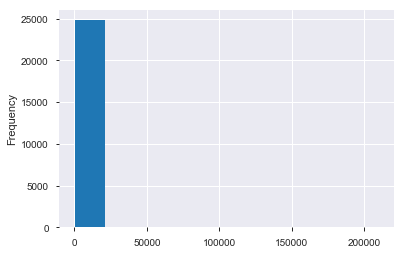

In [247]:
#Frequency distribution of Size
%matplotlib inline
dataset_unique.iloc[:,2].plot.hist()

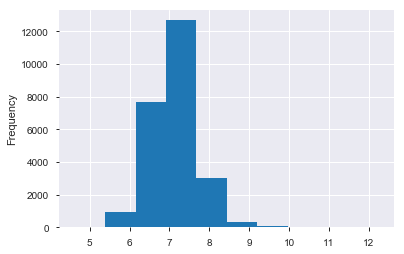

In [248]:
np.log(dataset_unique.iloc[:,2]).plot.hist()

In [250]:
dataset_unique["size_log"] = np.log(dataset_unique.iloc[:,2])
dataset_unique["price"] = np.log(dataset_unique.iloc[:,1])

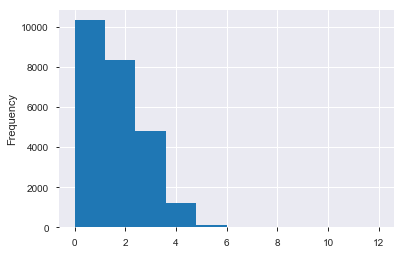

In [251]:
#Frequency distribution of Bedrooms
%matplotlib inline
dataset_unique.iloc[:,3].plot.hist()

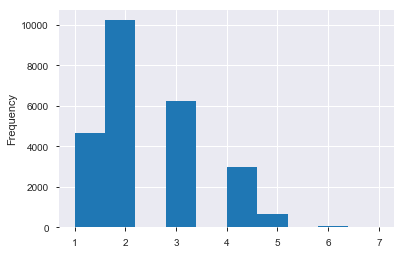

In [252]:
#Frequency distribution of Bathrooms
%matplotlib inline
dataset_unique.iloc[:,4].plot.hist()

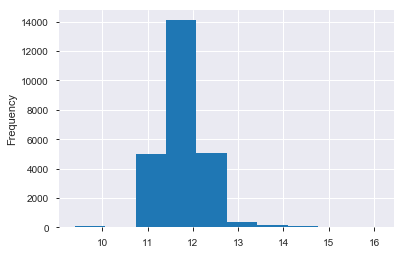

In [253]:
#Frequency distribution of Bathrooms
%matplotlib inline
dataset_unique.iloc[:,1].plot.hist()

In [254]:
dataset_unique["unequalrooms"]= np.where((dataset_unique['bedrooms']-dataset_unique['bathrooms'])>=0, 0, 1)


In [255]:
dataset_unique.head()

,neighbourhood,price,size,bedrooms,bathrooms,size_log,unequalrooms
0,PLY,11.561716,1493.0,1.0,2.0,7.308543,1
1,PLY,10.878047,400.0,0.0,1.0,5.991465,1
2,SNR,12.072541,1415.0,2.0,2.0,7.254885,0
3,SNR,11.736069,1106.0,1.0,2.0,7.008505,1
4,ZMS,11.608236,1052.0,1.0,2.0,6.958448,1


In [297]:
dataset_unique_ZMS = dataset_unique[dataset_unique['neighbourhood'] == "ZMS"]
dataset_unique_PLY = dataset_unique[dataset_unique['neighbourhood'] == "PLY"]
dataset_unique_SNR = dataset_unique[dataset_unique['neighbourhood'] == "SNR"]

In [260]:
dataset_unique.groupby(["bedrooms","neighbourhood"]).mean()

price          size  bathrooms  size_log  \
bedrooms neighbourhood                                                 
0.0      PLY            11.116323    544.628372   1.000000  6.208101   
         SNR            11.376044   1219.467589   1.000000  6.586614   
         ZMS            11.179416    580.248459   1.000000  6.224624   
1.0      PLY            11.412339    977.508774   1.701826  6.781231   
         SNR            11.672857   1154.550256   1.803419  7.003056   
         ZMS            11.531076   1013.406845   1.682787  6.780201   
2.0      PLY            11.735845   1532.922734   2.511369  7.243256   
         SNR            11.926214   1626.980653   2.585003  7.293269   
         ZMS            11.894172   1585.921316   2.527658  7.272287   
3.0      PLY            11.978356   1988.611686   3.343791  7.538209   
         SNR            12.161400   2099.123941   3.380410  7.609126   
         ZMS            12.239347   2581.249617   3.404015  7.727571   
4.0      PLY            12.210442   4267.318182   4.250000  8.074834   
         SNR            12.484752   3347.276703   4.218341  8.057565   
         ZMS            12.544206   3790.357504   4.281907  8.144959   
5.0      PLY            12.664831   5796.880000   5.480000  8.648841   
         SNR            12.760194   5094.363636   5.000000  8.499333   
         ZMS            12.890597   5285.251852   5.234568  8.511482   
6.0      PLY            12.765688   7000.000000   5.000000  8.853665   
         SNR            12.765688   5500.000000   7.000000  8.612503   
         ZMS            13.789864  23802.500000   6.500000  9.766598   
9.0      ZMS            12.388394   1700.000000   2.000000  7.438384   
10.0     PLY            11.462053    405.000000   6.000000  6.003887   
         ZMS            11.302204    867.000000   2.000000  6.765039   
12.0     SNR            11.732859   1315.000000   2.000000  7.177753   

                        unequalrooms  
bedrooms neighbourhood                
0.0      PLY                1.000000  
         SNR                1.000000  
         ZMS                1.000000  
1.0      PLY                0.701826  
         SNR                0.803419  
         ZMS                0.682787  
2.0      PLY                0.521475  
         SNR                0.592444  
         ZMS                0.540190  
3.0      PLY                0.498039  
         SNR                0.525437  
         ZMS                0.531752  
4.0      PLY                0.477273  
         SNR                0.495633  
         ZMS                0.523142  
5.0      PLY                0.720000  
         SNR                0.272727  
         ZMS                0.592593  
6.0      PLY                0.000000  
         SNR                1.000000  
         ZMS                0.500000  
9.0      ZMS                0.000000  
10.0     PLY                0.000000  
         ZMS                0.000000  
12.0     SNR                0.000000

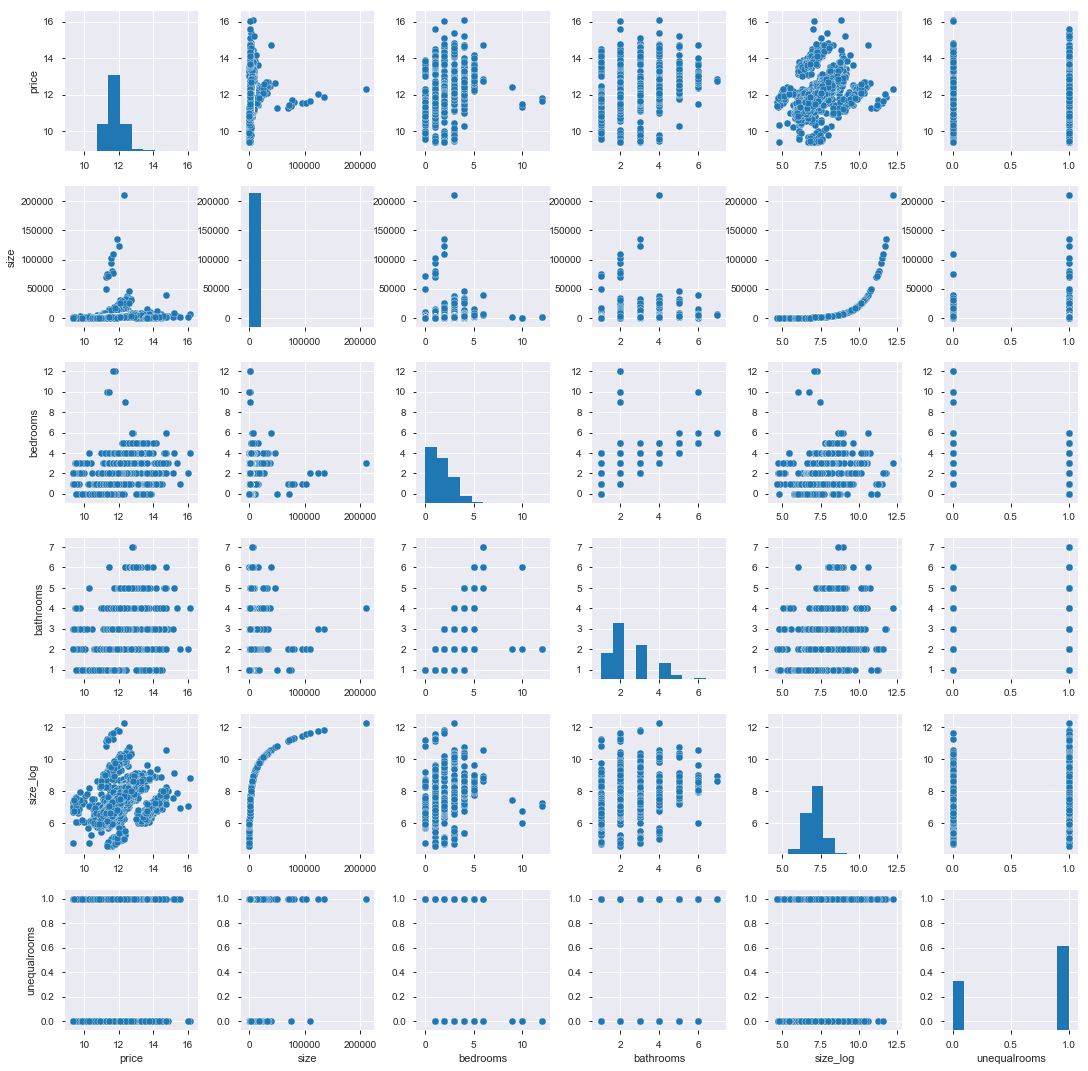

In [258]:
sns.pairplot(dataset_unique)

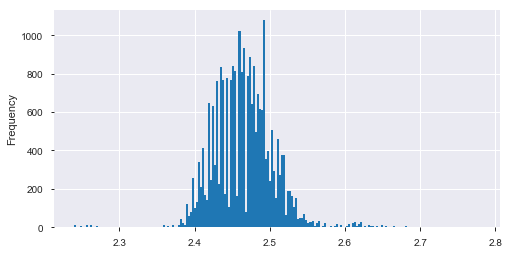

In [262]:
np.log(dataset_unique['price']).plot.hist(bins=200,figsize=(8,4))


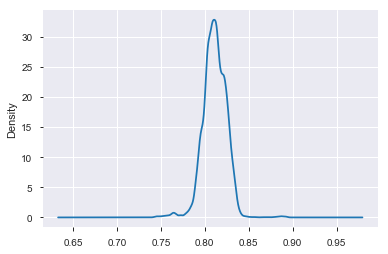

In [272]:
dataset_unique['price'].plot.density()


mean :  11.78253452137706
var  :  0.23829022562491742
skew :  0.8322703186127668
kurt :  4.987095860642463


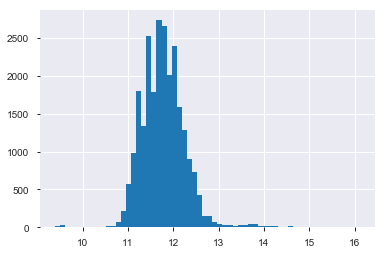

In [267]:
plt.hist(dataset_unique['price'], bins=60)

print("mean : ", np.mean(dataset_unique['price']))
print("var  : ", np.var(dataset_unique['price']))
print("skew : ",skew(dataset_unique['price']))
print("kurt : ",kurtosis(dataset_unique['price']))

In [259]:
dataset_unique.columns

Index(['neighbourhood', 'price', 'size', 'bedrooms', 'bathrooms', 'size_log',
       'unequalrooms'],
      dtype='object')

MODELLING

In [298]:
dataset_unique_ZMS.head()

,neighbourhood,price,size,bedrooms,bathrooms,size_log,unequalrooms
4,ZMS,11.608236,1052.0,1.0,2.0,6.958448,1
8,ZMS,11.736069,1320.0,2.0,2.0,7.185387,0
9,ZMS,11.314475,570.0,0.0,1.0,6.345636,1
10,ZMS,11.918391,1330.0,2.0,3.0,7.192934,1
11,ZMS,11.835009,1800.0,2.0,3.0,7.495542,1


In [300]:
X = dataset_unique_ZMS.drop(['price', 'neighbourhood'],1)

In [301]:
X.head()

,size,bedrooms,bathrooms,size_log,unequalrooms
4,1052.0,1.0,2.0,6.958448,1
8,1320.0,2.0,2.0,7.185387,0
9,570.0,0.0,1.0,6.345636,1
10,1330.0,2.0,3.0,7.192934,1
11,1800.0,2.0,3.0,7.495542,1


In [302]:
y = dataset_unique_ZMS.iloc[:, 1]

In [303]:
y.head()

4     11.608236
8     11.736069
9     11.314475
10    11.918391
11    11.835009
Name: price, dtype: float64

In [304]:
from sklearn.cross_validation import train_test_split

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [306]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9678, 5)
(9678,)
(4149, 5)
(4149,)


In [329]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Simple Linear Regression

In [330]:
lm = LinearRegression()

In [338]:
X_train.head()

,size,bedrooms,bathrooms,size_log,unequalrooms
53045,427.0,0.0,1.0,6.056784,1
13267,1490.0,2.0,3.0,7.306531,1
41919,1130.0,1.0,2.0,7.029973,1
11958,1574.0,2.0,3.0,7.361375,1
66306,720.0,1.0,2.0,6.579251,1


In [335]:
y_train.shape

(9678,)

In [336]:
type(X_train.size_log)

pandas.core.series.Series

In [340]:
lm.fit?

/Users/mnoordeen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/mnoordeen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


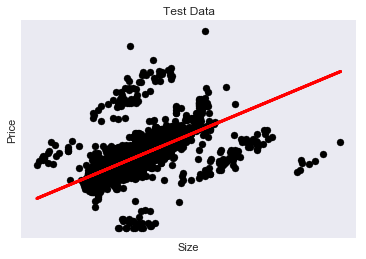

In [350]:
Y = y_train
X = X_train['size_log']
 
X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)
 
# Plot outputs
plt.scatter(X, Y,  color='black')
plt.title('Test Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())
# Create linear regression object
regr = LinearRegression()
 
# Train the model using the training sets
regr.fit(X, Y)
# Plot outputs
plt.plot(X, regr.predict(X), color='red',linewidth=3)
plt.show()


In [309]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [310]:
print("Intercept", lm.intercept_)
print("Coeff", lm.coef_)

Intercept 9.146956890956778
Coeff [-1.35289958e-05  1.74538327e-01  3.44101704e-02  3.20511035e-01
 -4.79283069e-03]


In [327]:
train_pred = lm.predict(X_train)

In [356]:
print("Mean Absolute Error", metrics.mean_absolute_error(y_train, train_pred))
print("Mean Squared Error", metrics.mean_squared_error(y_train, train_pred))
print("R square", metrics.r2_score(y_train, train_pred))

Mean Absolute Error 0.19148567141007855
Mean Squared Error 0.10427505477185015
R square 0.5664131460206537


In [316]:

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [317]:
mean_absolute_percentage_error(y_train, train_pred)

1.6115783318545813

In [351]:
test_pred = lm.predict(X_test)

In [355]:
print("Mean Absolute Error", metrics.mean_absolute_error(y_test, test_pred))
print("Mean Squared Error", metrics.mean_squared_error(y_test, test_pred))
print("R square", metrics.r2_score(y_test, test_pred))



Mean Absolute Error 0.19722468656941475
Mean Squared Error 0.11322772375775932
R square 0.5379782816624092


In [353]:
mean_absolute_percentage_error(y_test, test_pred)

1.6481408210974091

In [364]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer

from statsmodels.stats.outliers_influence import variance_inflation_factor
class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print('Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X


In [365]:
transformer = ReduceVIF()

# Only use 10 columns for speed in this example
X = transformer.fit_transform(X_train, y_train)

X.head()

ReduceVIF fit
ReduceVIF transform
Dropping {X.columns[maxloc]} with vif={max_vif}
Dropping {X.columns[maxloc]} with vif={max_vif}


,size,bedrooms,unequalrooms
0,427.0,0.0,1.0
1,1490.0,2.0,1.0
2,1130.0,1.0,1.0
3,1574.0,2.0,1.0
4,720.0,1.0,1.0


In [367]:
X

,size,bedrooms,unequalrooms
0,427.00,0.0,1.0
1,1490.00,2.0,1.0
2,1130.00,1.0,1.0
3,1574.00,2.0,1.0
4,720.00,1.0,1.0
5,3250.00,3.0,1.0
6,1700.00,2.0,0.0
7,2119.00,3.0,0.0
8,1270.00,2.0,0.0
9,930.00,1.0,0.0


In [368]:
np.log(100)

4.605170185988092

In [369]:
np.exp(4.605170185988092)

100.00000000000004